In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 125)
pd.set_option('display.max_columns', 125)

In [2]:
def missing_val(dataset) :
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
    
    return missing

# Application dataset

In [3]:
df_train = pd.read_csv("data/application_train.csv", index_col="SK_ID_CURR")
df_train.shape

(307511, 121)

In [4]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

### Class distribution

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

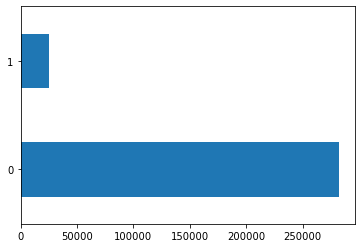

In [5]:
df_train.TARGET.value_counts().plot(kind='barh')
df_train.TARGET.value_counts()/len(df_train)

Kelas tidak seimbang dimana sekitar 92% klien tidak memiliki kesulitan pembayaran (Target = 0) dan sekitar 8% klien mengalami kesulitan pembayaran kredit (Target = 1)

### Contract Type

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

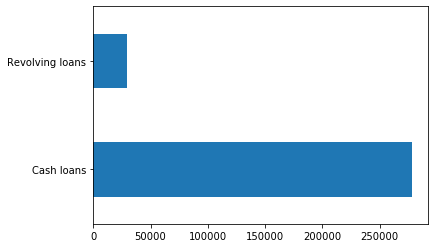

In [6]:
df_train.NAME_CONTRACT_TYPE.value_counts().plot(kind='barh')
df_train.NAME_CONTRACT_TYPE.value_counts()/len(df_train)

sekitar 90% Klien melakukan Cash loan dan 10% sisanya melakukan revolving loan

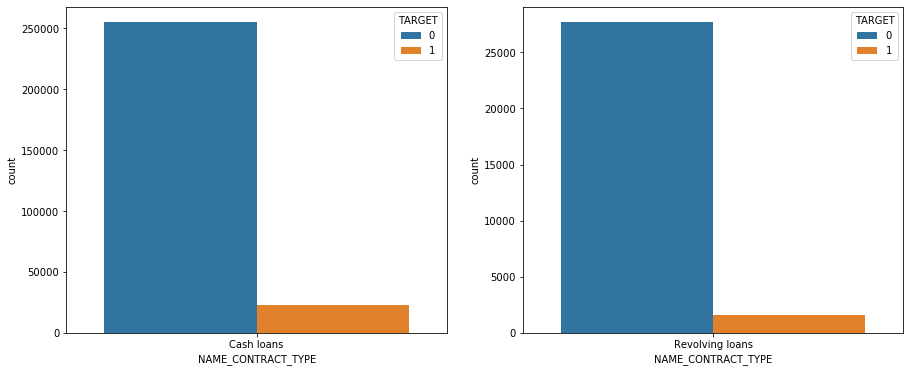

In [7]:
figure, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', 
              data=df_train.loc[df_train.NAME_CONTRACT_TYPE == 'Cash loans'], ax=axes[0])
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', 
              data=df_train.loc[df_train.NAME_CONTRACT_TYPE == 'Revolving loans'], ax=axes[1])

### Gender

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

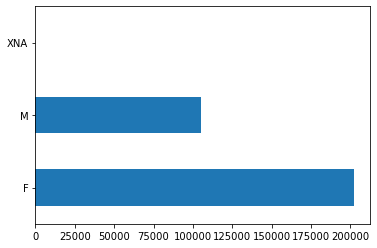

In [8]:
df_train.CODE_GENDER.value_counts().plot(kind='barh')
df_train.CODE_GENDER.value_counts()/len(df_train)

Sekitar 65% klien adalah Perempuan dan 34% adalah Laki-laki. Terdapat 4 data dengan gender XNA

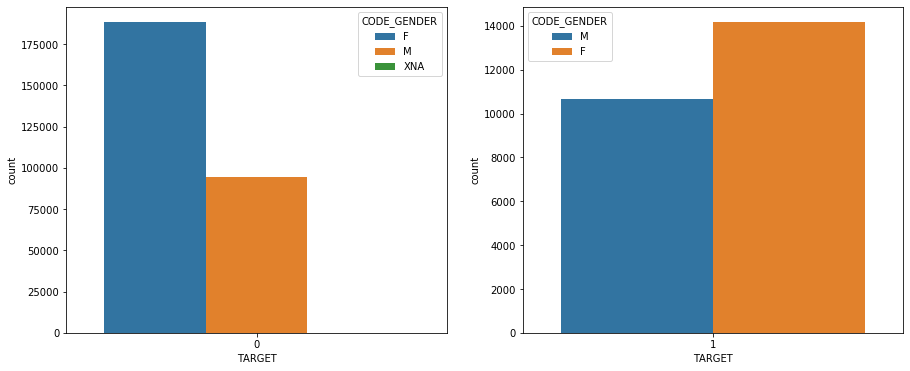

In [9]:
figure, axes = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(x='TARGET', hue='CODE_GENDER', 
              data=df_train.loc[df_train.TARGET == 0], ax=axes[0])
sns.countplot(x='TARGET', hue='CODE_GENDER', 
              data=df_train.loc[df_train.TARGET == 1], ax=axes[1])

In [10]:
male = df_train.loc[df_train.CODE_GENDER == 'M']
female = df_train.loc[df_train.CODE_GENDER == 'F']

In [12]:
male.TARGET.value_counts()/len(male)

0    0.898581
1    0.101419
Name: TARGET, dtype: float64

In [13]:
female.TARGET.value_counts()/len(female)

0    0.930007
1    0.069993
Name: TARGET, dtype: float64

### Client own car and realty

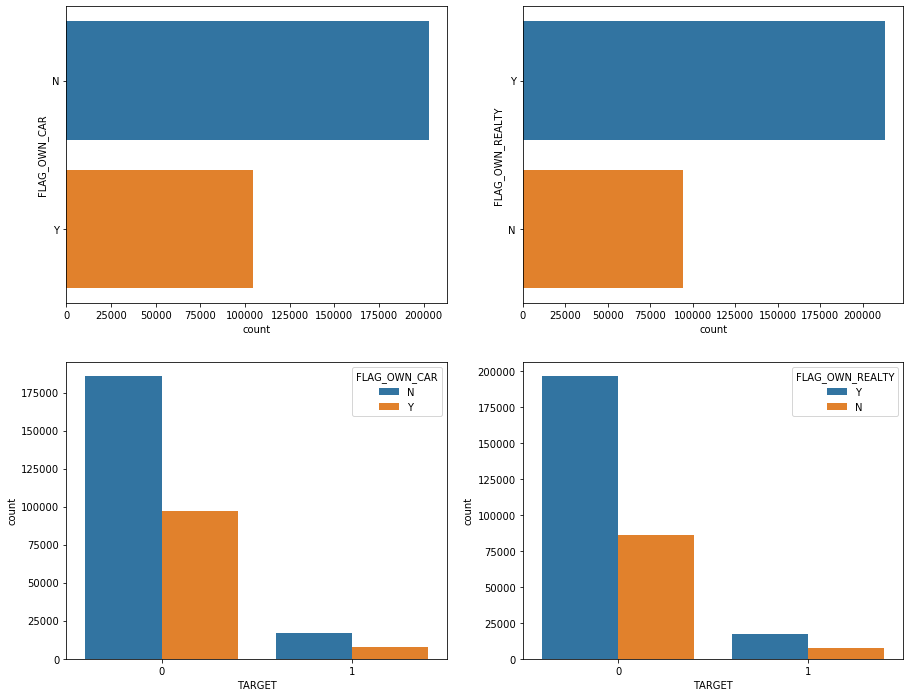

In [54]:
figure, axes = plt.subplots(2, 2, figsize=(15,12))

sns.countplot(y='FLAG_OWN_CAR', data=df_train, ax=axes[0, 0])
sns.countplot(y='FLAG_OWN_REALTY', data=df_train, ax=axes[0, 1])

sns.countplot(x='TARGET', hue='FLAG_OWN_CAR', data=df_train, ax=axes[1, 0])
sns.countplot(x='TARGET', hue='FLAG_OWN_REALTY', data=df_train, ax=axes[1, 1])

In [18]:
a = df_train.loc[df_train.FLAG_OWN_REALTY == 'N']
b = df_train.loc[df_train.FLAG_OWN_REALTY == 'Y']

In [19]:
a.TARGET.value_counts()/len(a)

0    0.916751
1    0.083249
Name: TARGET, dtype: float64

In [20]:
b.TARGET.value_counts()/len(b)

0    0.920384
1    0.079616
Name: TARGET, dtype: float64

### Family status

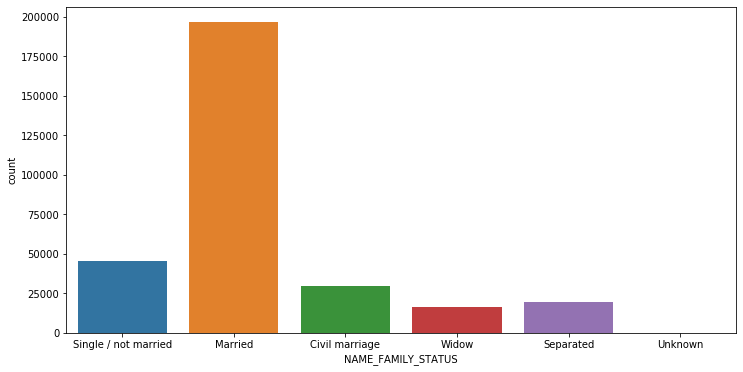

In [76]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_FAMILY_STATUS', data=df_train)

Mayoritas klien bestatus Married diikuti Single/not married dan Civil marriage

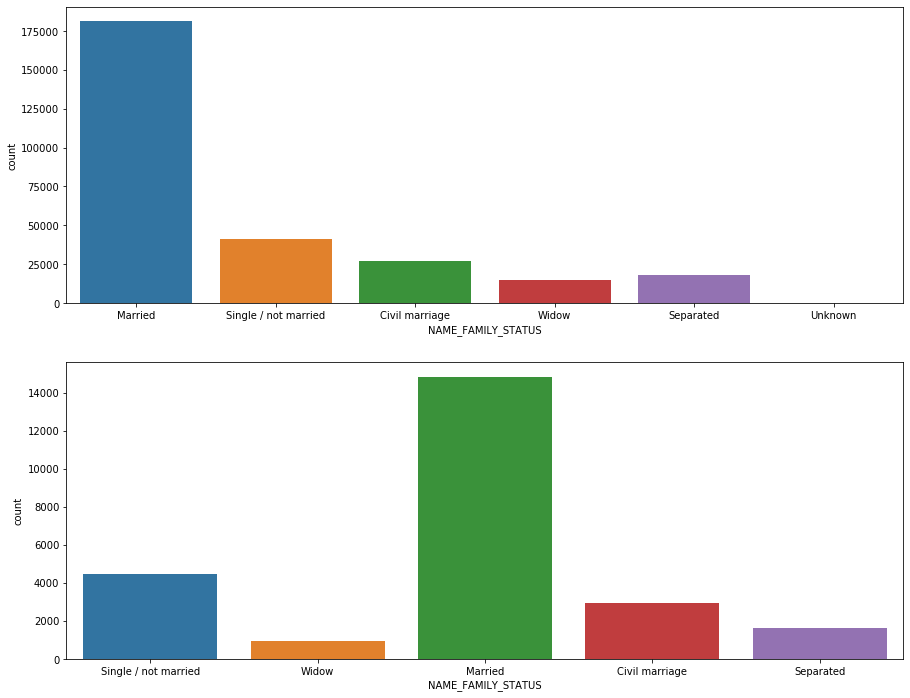

In [77]:
figure, axes = plt.subplots(2, 1, figsize=(15,12))

sns.countplot(x='NAME_FAMILY_STATUS', data=df_train.loc[df_train.TARGET == 0], ax=axes[0])
sns.countplot(x='NAME_FAMILY_STATUS', data=df_train.loc[df_train.TARGET == 1], ax=axes[1])

In [21]:
a = df_train.loc[df_train.NAME_FAMILY_STATUS == 'Married']
b = df_train.loc[df_train.NAME_FAMILY_STATUS == 'Single / not married']

In [22]:
a.TARGET.value_counts()/len(a)

0    0.924401
1    0.075599
Name: TARGET, dtype: float64

In [23]:
b.TARGET.value_counts()/len(b)

0    0.901923
1    0.098077
Name: TARGET, dtype: float64

### Count children

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

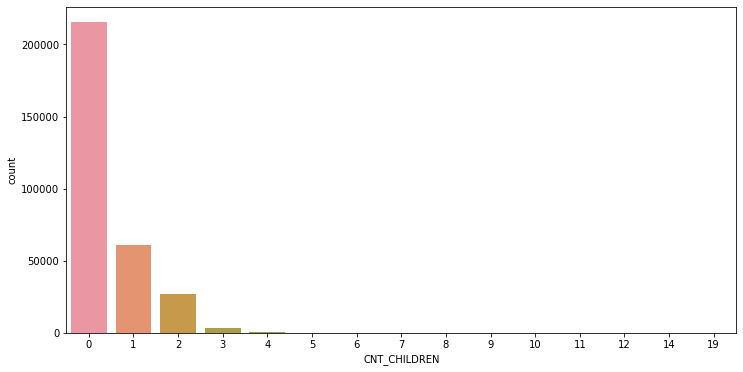

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(x='CNT_CHILDREN', data=df_train)
df_train.CNT_CHILDREN.value_counts()

Mayoritas klien tidak memiliki anak

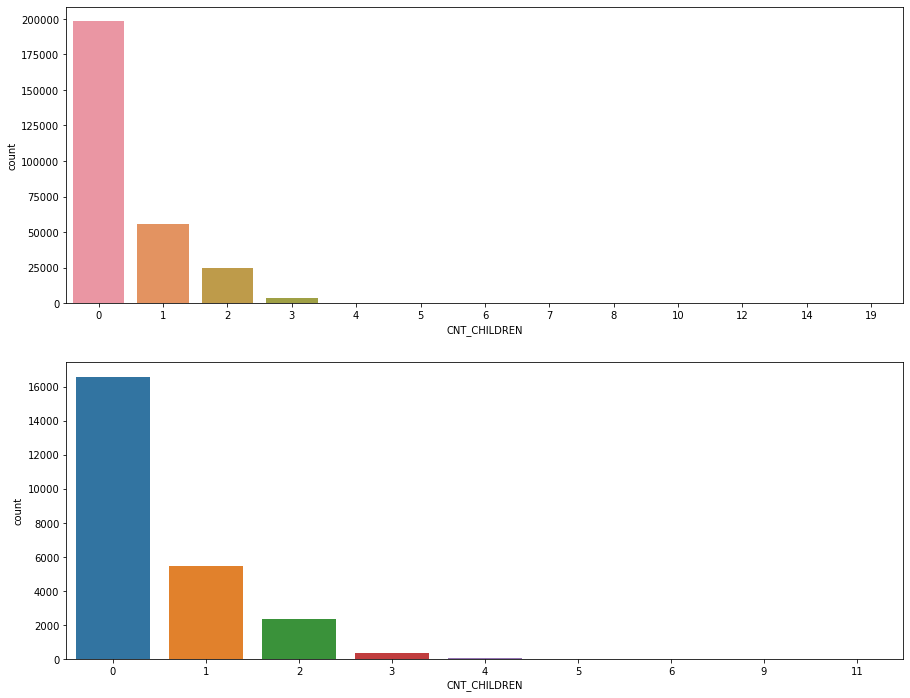

In [81]:
figure, axes = plt.subplots(2, 1, figsize=(15,12))

sns.countplot(x='CNT_CHILDREN', data=df_train.loc[df_train.TARGET == 0], ax=axes[0])
sns.countplot(x='CNT_CHILDREN', data=df_train.loc[df_train.TARGET == 1], ax=axes[1])

### Family members

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

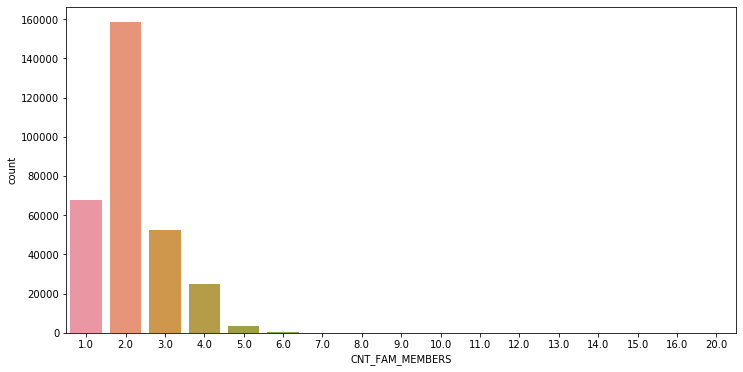

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x='CNT_FAM_MEMBERS', data=df_train)
df_train.CNT_FAM_MEMBERS.value_counts()

### Income type

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

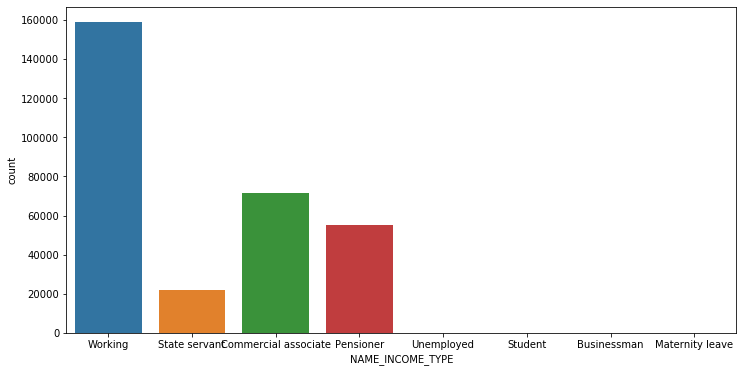

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x='NAME_INCOME_TYPE', data=df_train)
df_train.NAME_INCOME_TYPE.value_counts()

In [ ]:
NAME_INCOME_TYPE

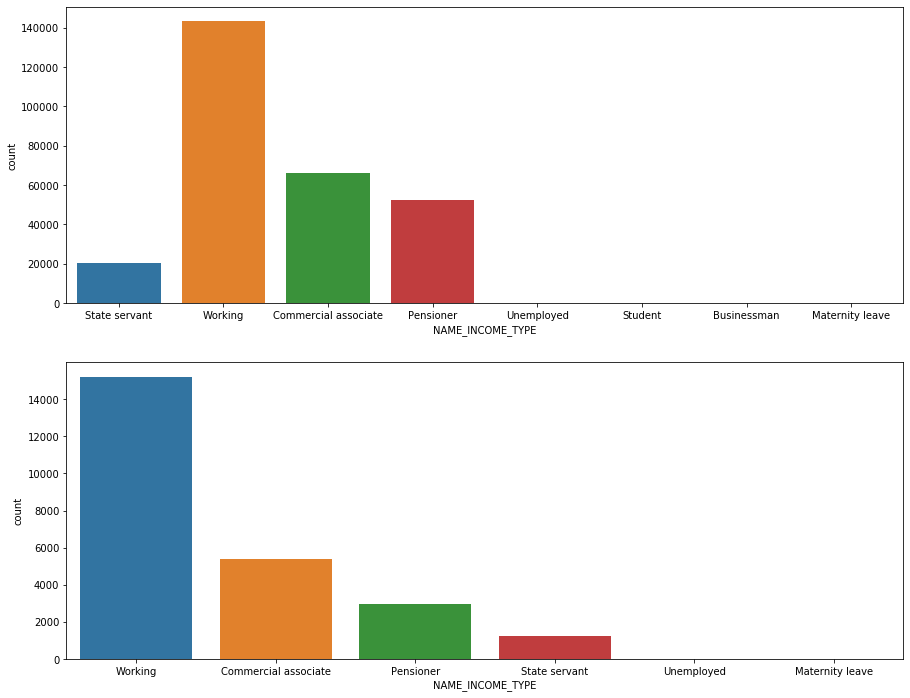

In [85]:
figure, axes = plt.subplots(2, 1, figsize=(15,12))

sns.countplot(x='NAME_INCOME_TYPE', data=df_train.loc[df_train.TARGET == 0], ax=axes[0])
sns.countplot(x='NAME_INCOME_TYPE', data=df_train.loc[df_train.TARGET == 1], ax=axes[1])

### Occupation Type

Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

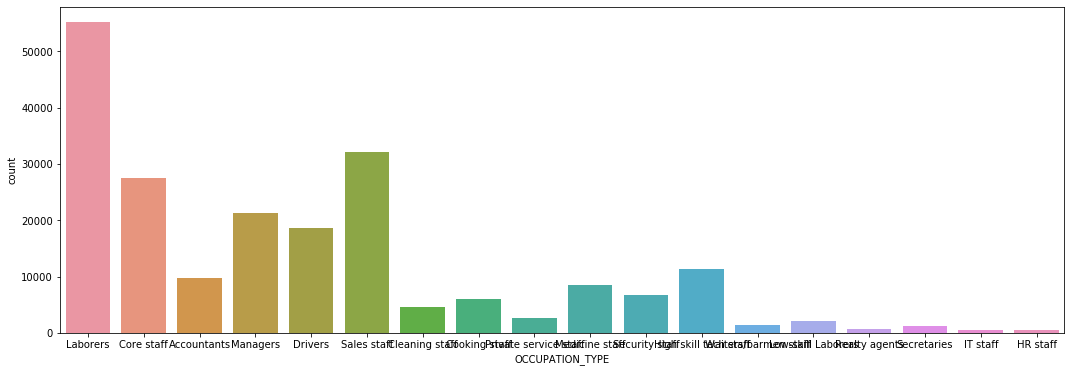

In [33]:
plt.figure(figsize=(18,6))
sns.countplot(x='OCCUPATION_TYPE', data=df_train)
df_train.OCCUPATION_TYPE.value_counts()/len(df_train)*100

In [30]:
a = df_train.loc[df_train.OCCUPATION_TYPE == 'Accountants']
a.TARGET.value_counts()/len(a)

0    0.951697
1    0.048303
Name: TARGET, dtype: float64

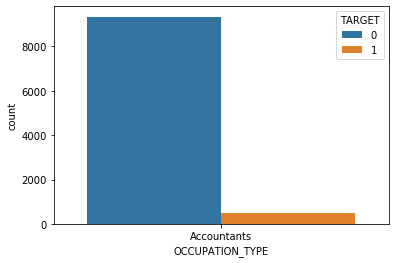

In [32]:
sns.countplot(x='OCCUPATION_TYPE',hue='TARGET', data=a)

### Education type

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

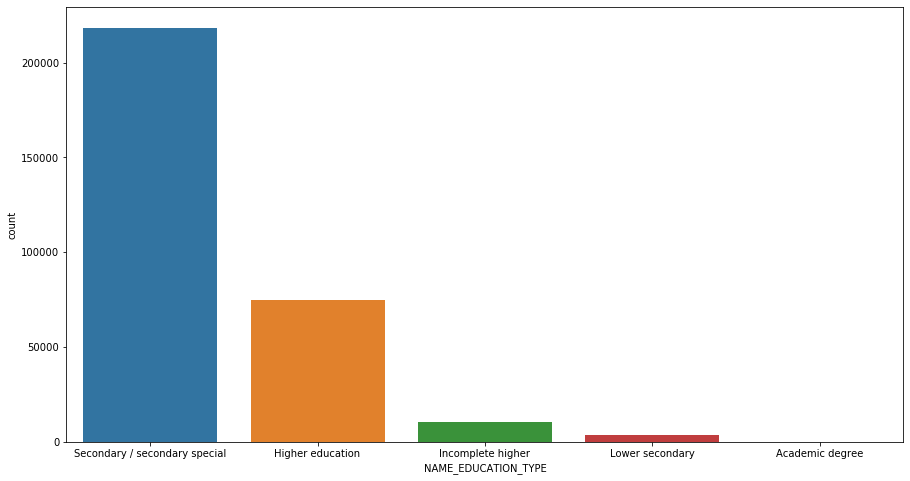

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(x='NAME_EDUCATION_TYPE', data=df_train)
df_train.NAME_EDUCATION_TYPE.value_counts()

### Organizaton type

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

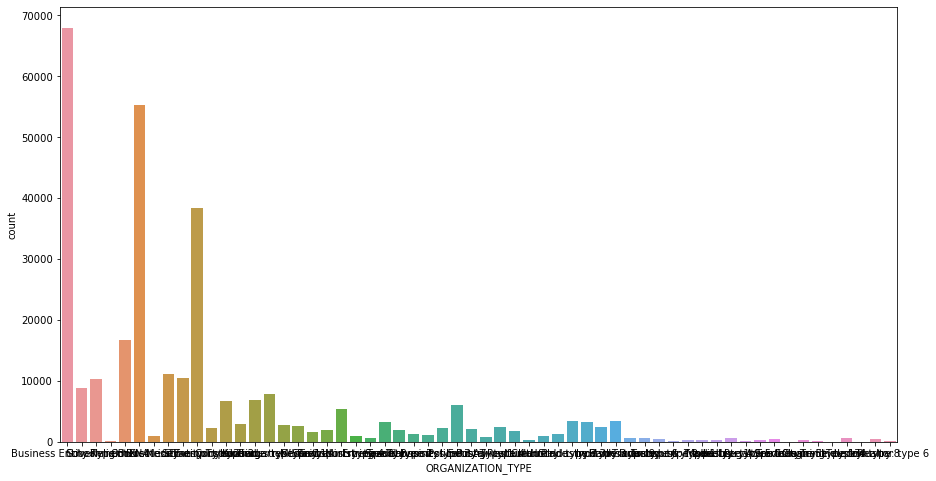

In [91]:
plt.figure(figsize=(15,8))
sns.countplot(x='ORGANIZATION_TYPE', data=df_train)
df_train.ORGANIZATION_TYPE.value_counts()

### Type house

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

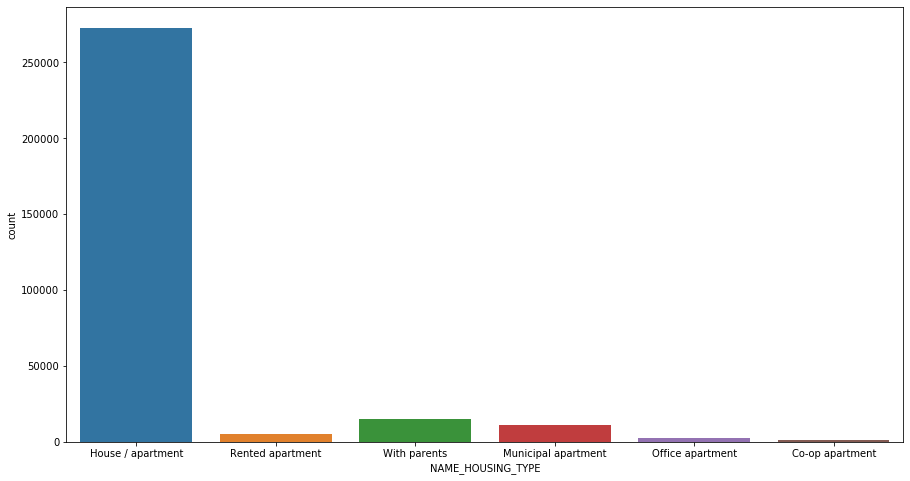

In [92]:
plt.figure(figsize=(15,8))
sns.countplot(x='NAME_HOUSING_TYPE', data=df_train)
df_train.NAME_HOUSING_TYPE.value_counts()

### Missing value

In [12]:
missing_val(df_train)

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
